# Assignment 13: Decision Tree Classification

## Dataset: Heart Disease Prediction

**Objective:** Apply Decision Tree Classification to predict heart disease.

**Topics Covered:**
- Data Preparation and EDA
- Feature Engineering
- Decision Tree Classification
- Hyperparameter Tuning
- Model Evaluation

---
## Step 1: Import Libraries and Load Data

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Load the dataset (second sheet contains the data)
df = pd.read_excel('datasets/heart_disease.xlsx', sheet_name=1)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (303, 13)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,50,1,2,137,362,0,1,178,1,5.9,2,reversible defect,4
1,30,0,3,146,336,0,0,151,0,0.5,2,normal,4
2,61,0,1,107,393,0,1,85,0,3.6,2,reversible defect,4
3,68,0,1,164,208,1,0,75,0,2.0,2,reversible defect,1
4,55,0,3,185,238,0,2,168,0,4.5,0,reversible defect,1


---
## Step 2: Exploratory Data Analysis (EDA)

In [3]:
# Check data types and info
print("=== Dataset Info ===")
print(df.dtypes)
print("\n=== Statistical Summary ===")
df.describe()

=== Dataset Info ===
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal         object
num           int64
dtype: object

=== Statistical Summary ===


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,52.448845,0.471947,1.422442,145.749175,345.429043,0.514851,0.891089,138.943894,0.514851,3.341254,0.947195,0.970297
std,14.472280,0.500038,1.139198,29.918373,129.300515,0.500606,0.808494,37.002776,0.500606,1.781783,0.812068,1.248486
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,121.000000,222.000000,0.000000,0.000000,109.000000,0.000000,1.800000,0.000000,0.000000
50%,53.000000,0.000000,1.000000,145.000000,341.000000,1.000000,1.000000,141.000000,1.000000,3.500000,1.000000,0.000000
75%,66.000000,1.000000,2.000000,171.000000,461.000000,1.000000,2.000000,169.500000,1.000000,4.750000,2.000000,2.000000
max,76.000000,1.000000,3.000000,199.000000,562.000000,1.000000,2.000000,201.000000,1.000000,6.200000,2.000000,4.000000


In [4]:
# Check for missing values
print("=== Missing Values ===")
missing = df.isnull().sum()
print(missing)
print("\nTotal missing:", missing.sum())

=== Missing Values ===
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Total missing: 0


In [5]:
# Check unique values in categorical columns
print("=== Unique Values in Categorical Columns ===")
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_cols:
    print(col + ":", df[col].unique())

=== Unique Values in Categorical Columns ===
sex: [1 0]
cp: [2 3 1 0]
fbs: [0 1]
restecg: [1 0 2]
exang: [1 0]
slope: [2 0 1]
thal: ['reversible defect' 'normal' 'fixed defect']


In [6]:
# Target variable distribution
print("=== Target Variable (num) Distribution ===")
target_counts = df['num'].value_counts()
print(target_counts)

# Convert to binary (0 = no disease, 1 = disease)
# Original: 0, 1, 2, 3, 4 (stages of heart disease)
# Binary: 0 = no disease, 1 = has disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

print("\nAfter converting to binary:")
print(df['target'].value_counts())

=== Target Variable (num) Distribution ===
num
0    157
1     62
2     39
3     26
4     19
Name: count, dtype: int64

After converting to binary:
target
0    157
1    146
Name: count, dtype: int64


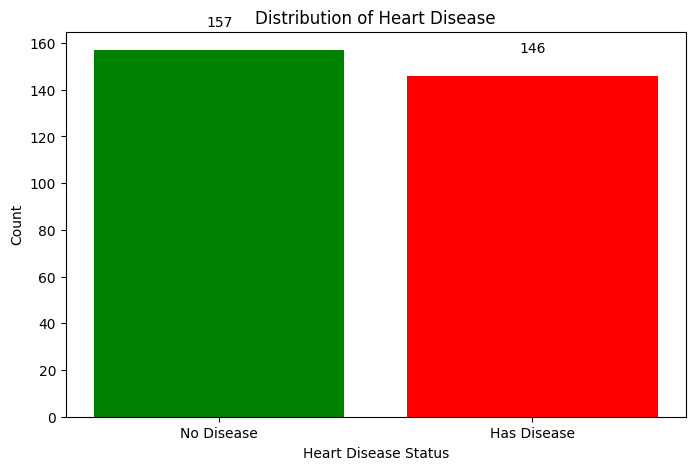

In [7]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
colors = ['green', 'red']
target_counts = df['target'].value_counts()
plt.bar(['No Disease', 'Has Disease'], target_counts.values, color=colors)
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')

# Add count labels
for i in range(len(target_counts)):
    plt.text(i, target_counts.values[i] + 10, str(target_counts.values[i]), ha='center')

plt.show()

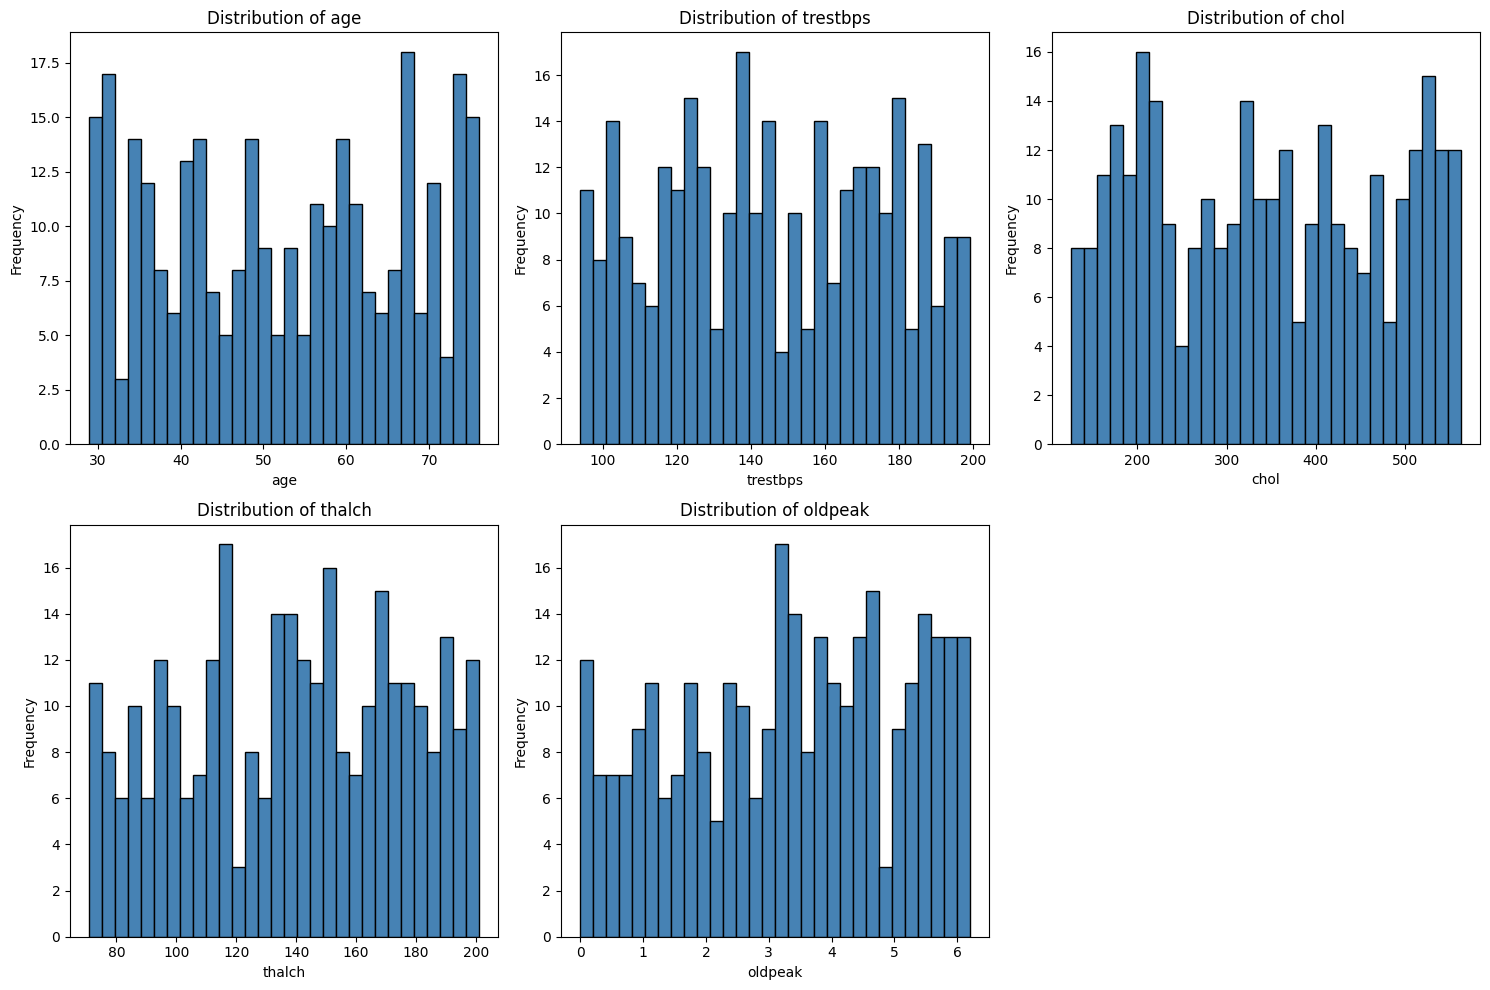

In [8]:
# Histograms for numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title('Distribution of ' + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

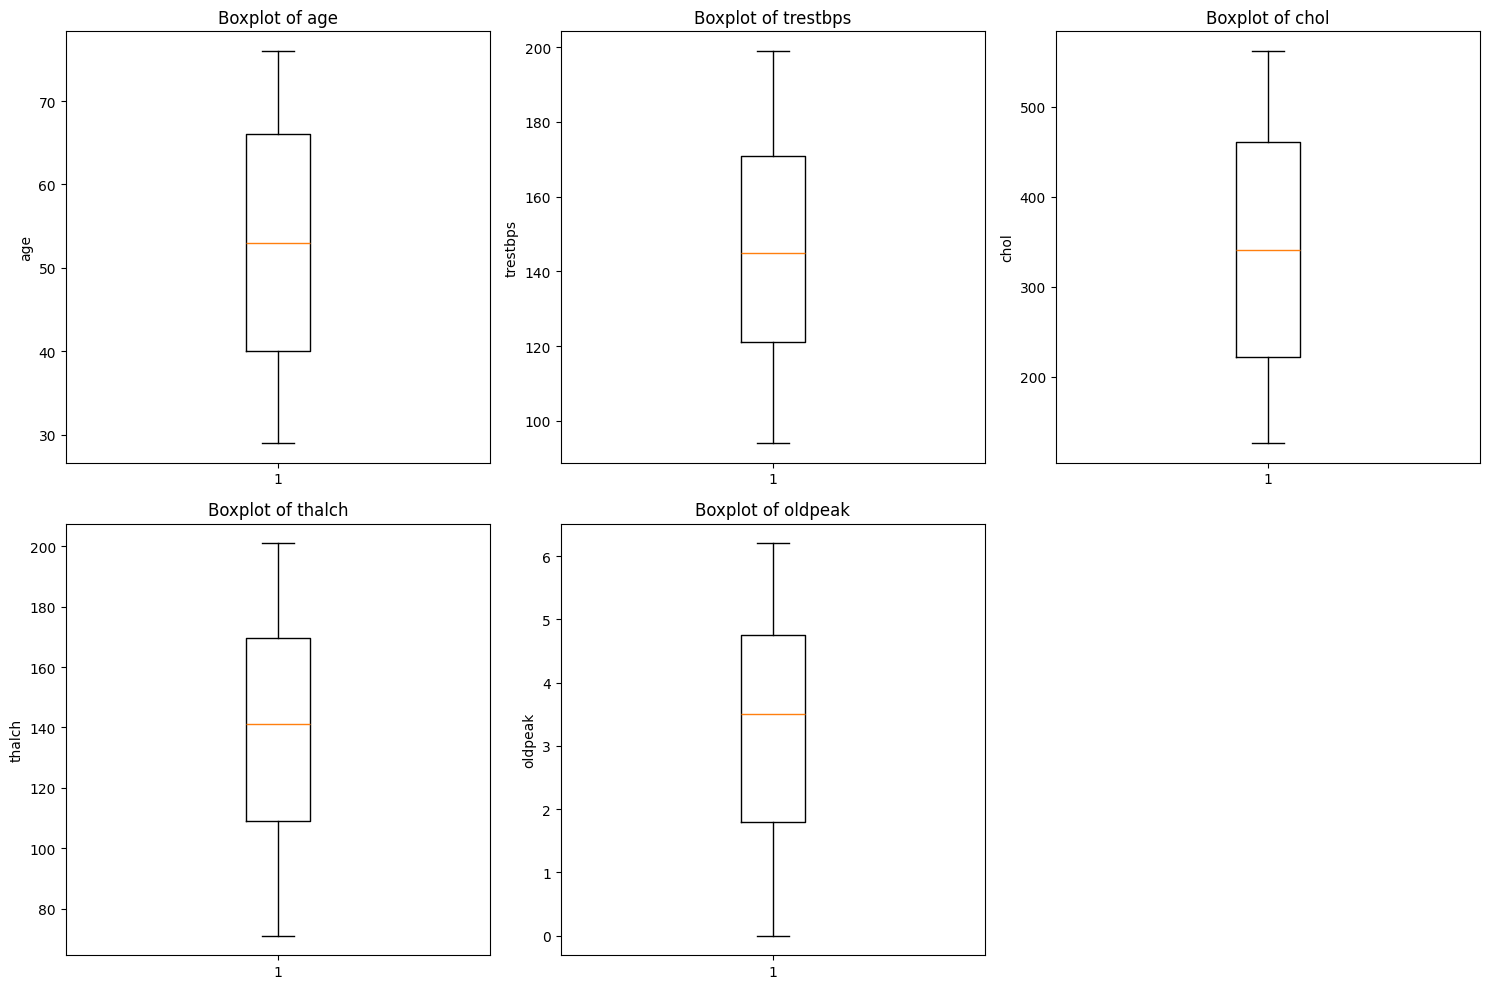

In [9]:
# Boxplots to check for outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title('Boxplot of ' + col)
    axes[i].set_ylabel(col)

axes[5].axis('off')

plt.tight_layout()
plt.show()

---
## Step 3: Feature Engineering

In [10]:
# Handle missing values
print("=== Handling Missing Values ===")

# Fill numerical missing values with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print("Filled", col, "with median:", median_val)

# Fill categorical missing values with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print("Filled", col, "with mode:", mode_val)

print("\nRemaining missing values:", df.isnull().sum().sum())

=== Handling Missing Values ===

Remaining missing values: 0


In [11]:
# Encode categorical variables using Label Encoding
print("=== Label Encoding Categorical Variables ===")

# Create a copy for encoding
df_encoded = df.copy()

# Apply label encoding to categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
    print(col + ":")
    print("  Original:", list(le.classes_))
    print("  Encoded:", list(range(len(le.classes_))))
    print()

=== Label Encoding Categorical Variables ===
sex:
  Original: ['0', '1']
  Encoded: [0, 1]

cp:
  Original: ['0', '1', '2', '3']
  Encoded: [0, 1, 2, 3]

fbs:
  Original: ['0', '1']
  Encoded: [0, 1]

restecg:
  Original: ['0', '1', '2']
  Encoded: [0, 1, 2]

exang:
  Original: ['0', '1']
  Encoded: [0, 1]

slope:
  Original: ['0', '1', '2']
  Encoded: [0, 1, 2]

thal:
  Original: ['fixed defect', 'normal', 'reversible defect']
  Encoded: [0, 1, 2]



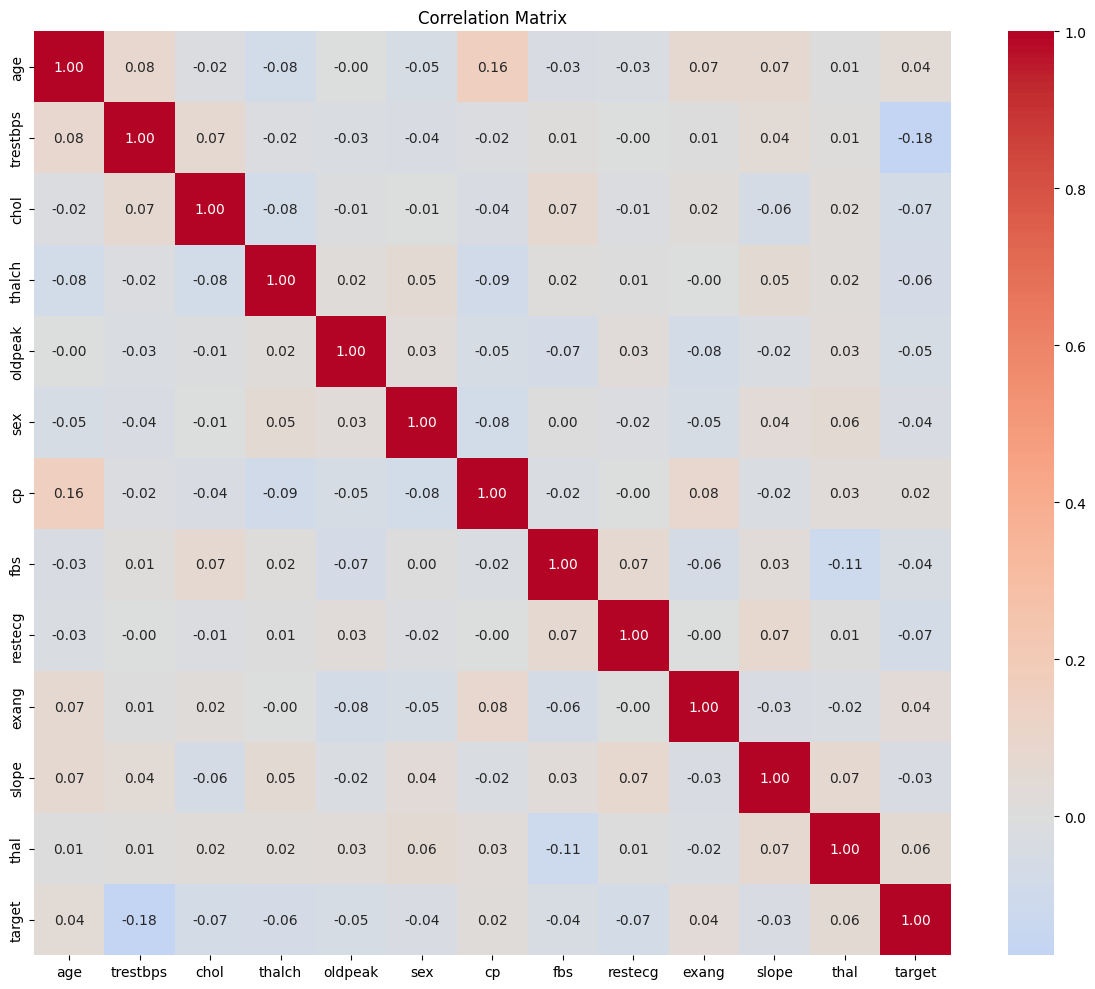

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))

# Select only numerical columns for correlation
numeric_df = df_encoded[numerical_cols + categorical_cols + ['target']]
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

---
## Step 4: Decision Tree Classification

In [13]:
# Prepare features and target
print("=== Preparing Data for Model ===")

# Features (X) - all columns except 'num' and 'target'
feature_cols = numerical_cols + categorical_cols
X = df_encoded[feature_cols]

# Target (y)
y = df_encoded['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", feature_cols)

=== Preparing Data for Model ===
Features shape: (303, 12)
Target shape: (303,)

Feature columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [14]:
# Split data into training and testing sets (80-20 split)
print("=== Train-Test Split ===")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("\nTraining percentage:", round(len(X_train)/len(X)*100, 1), "%")
print("Testing percentage:", round(len(X_test)/len(X)*100, 1), "%")

=== Train-Test Split ===
Training set size: 242
Testing set size: 61

Training percentage: 79.9 %
Testing percentage: 20.1 %


In [15]:
# Create and train Decision Tree model
print("=== Training Decision Tree Model ===")

# Create model with default parameters
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

print("Model trained successfully!")
print("\nModel parameters:")
print("  Max depth:", dt_model.max_depth)
print("  Min samples split:", dt_model.min_samples_split)
print("  Criterion:", dt_model.criterion)

=== Training Decision Tree Model ===
Model trained successfully!

Model parameters:
  Max depth: None
  Min samples split: 2
  Criterion: gini


In [16]:
# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

print("Predictions made on test set")
print("\nSample predictions (first 10):")
for i in range(10):
    print("Actual:", y_test.iloc[i], "| Predicted:", y_pred[i])

Predictions made on test set

Sample predictions (first 10):
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 1
Actual: 0 | Predicted: 1


In [17]:
# Evaluate model performance
print("=== Model Evaluation (Default Parameters) ===")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

=== Model Evaluation (Default Parameters) ===
Accuracy: 0.4754
Precision: 0.4848
Recall: 0.5161
F1-Score: 0.5
ROC-AUC: 0.4747


=== Confusion Matrix ===


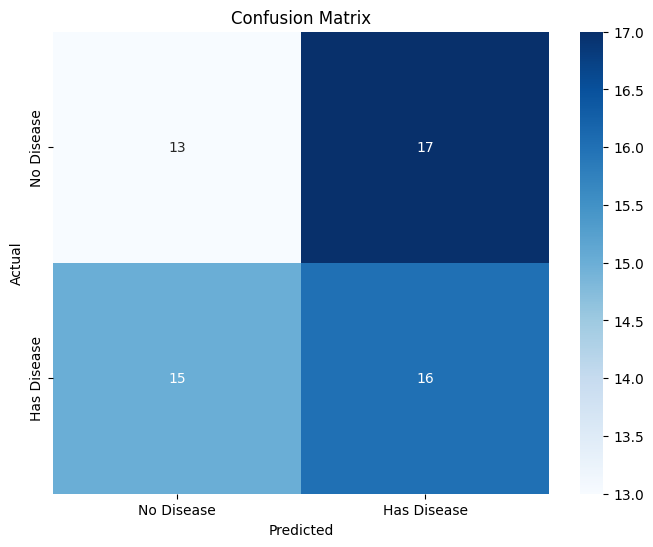


Interpretation:
True Negatives: 13
False Positives: 17
False Negatives: 15
True Positives: 16


In [18]:
# Confusion Matrix
print("=== Confusion Matrix ===")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nInterpretation:")
print("True Negatives:", cm[0][0])
print("False Positives:", cm[0][1])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])

In [19]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Has Disease']))

=== Classification Report ===
              precision    recall  f1-score   support

  No Disease       0.46      0.43      0.45        30
 Has Disease       0.48      0.52      0.50        31

    accuracy                           0.48        61
   macro avg       0.47      0.47      0.47        61
weighted avg       0.47      0.48      0.47        61



---
## Step 5: Hyperparameter Tuning

In [20]:
# Hyperparameter Tuning
print("=== Hyperparameter Tuning ===")
print("")
print("Testing different values for:")
print("- max_depth: Maximum depth of tree")
print("- min_samples_split: Minimum samples to split a node")
print("- criterion: 'gini' or 'entropy'")
print("")

# Store results
results = []

# Try different combinations
max_depths = [3, 5, 7, 10, None]
min_samples_splits = [2, 5, 10]
criterions = ['gini', 'entropy']

best_accuracy = 0
best_params = {}

for depth in max_depths:
    for min_split in min_samples_splits:
        for criterion in criterions:
            # Create and train model
            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=min_split,
                criterion=criterion,
                random_state=42
            )
            model.fit(X_train, y_train)
            
            # Evaluate
            y_pred_temp = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred_temp)
            
            # Store result
            results.append({
                'max_depth': depth,
                'min_samples_split': min_split,
                'criterion': criterion,
                'accuracy': acc
            })
            
            # Update best
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = {
                    'max_depth': depth,
                    'min_samples_split': min_split,
                    'criterion': criterion
                }

print("Tuning complete!")
print("\nBest parameters found:")
print("  max_depth:", best_params['max_depth'])
print("  min_samples_split:", best_params['min_samples_split'])
print("  criterion:", best_params['criterion'])
print("\nBest accuracy:", round(best_accuracy, 4))

=== Hyperparameter Tuning ===

Testing different values for:
- max_depth: Maximum depth of tree
- min_samples_split: Minimum samples to split a node
- criterion: 'gini' or 'entropy'

Tuning complete!

Best parameters found:
  max_depth: 10
  min_samples_split: 10
  criterion: entropy

Best accuracy: 0.5902


In [21]:
# Train model with best parameters
print("=== Training Model with Best Parameters ===")

best_model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    criterion=best_params['criterion'],
    random_state=42
)
best_model.fit(X_train, y_train)

# Evaluate
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print("\n=== Tuned Model Performance ===")
print("Accuracy:", round(accuracy_best, 4))
print("Precision:", round(precision_best, 4))
print("Recall:", round(recall_best, 4))
print("F1-Score:", round(f1_best, 4))
print("ROC-AUC:", round(roc_auc_best, 4))

=== Training Model with Best Parameters ===

=== Tuned Model Performance ===
Accuracy: 0.5902
Precision: 0.5882
Recall: 0.6452
F1-Score: 0.6154
ROC-AUC: 0.5651


---
## Step 6: Model Visualization and Analysis

=== Decision Tree Visualization ===


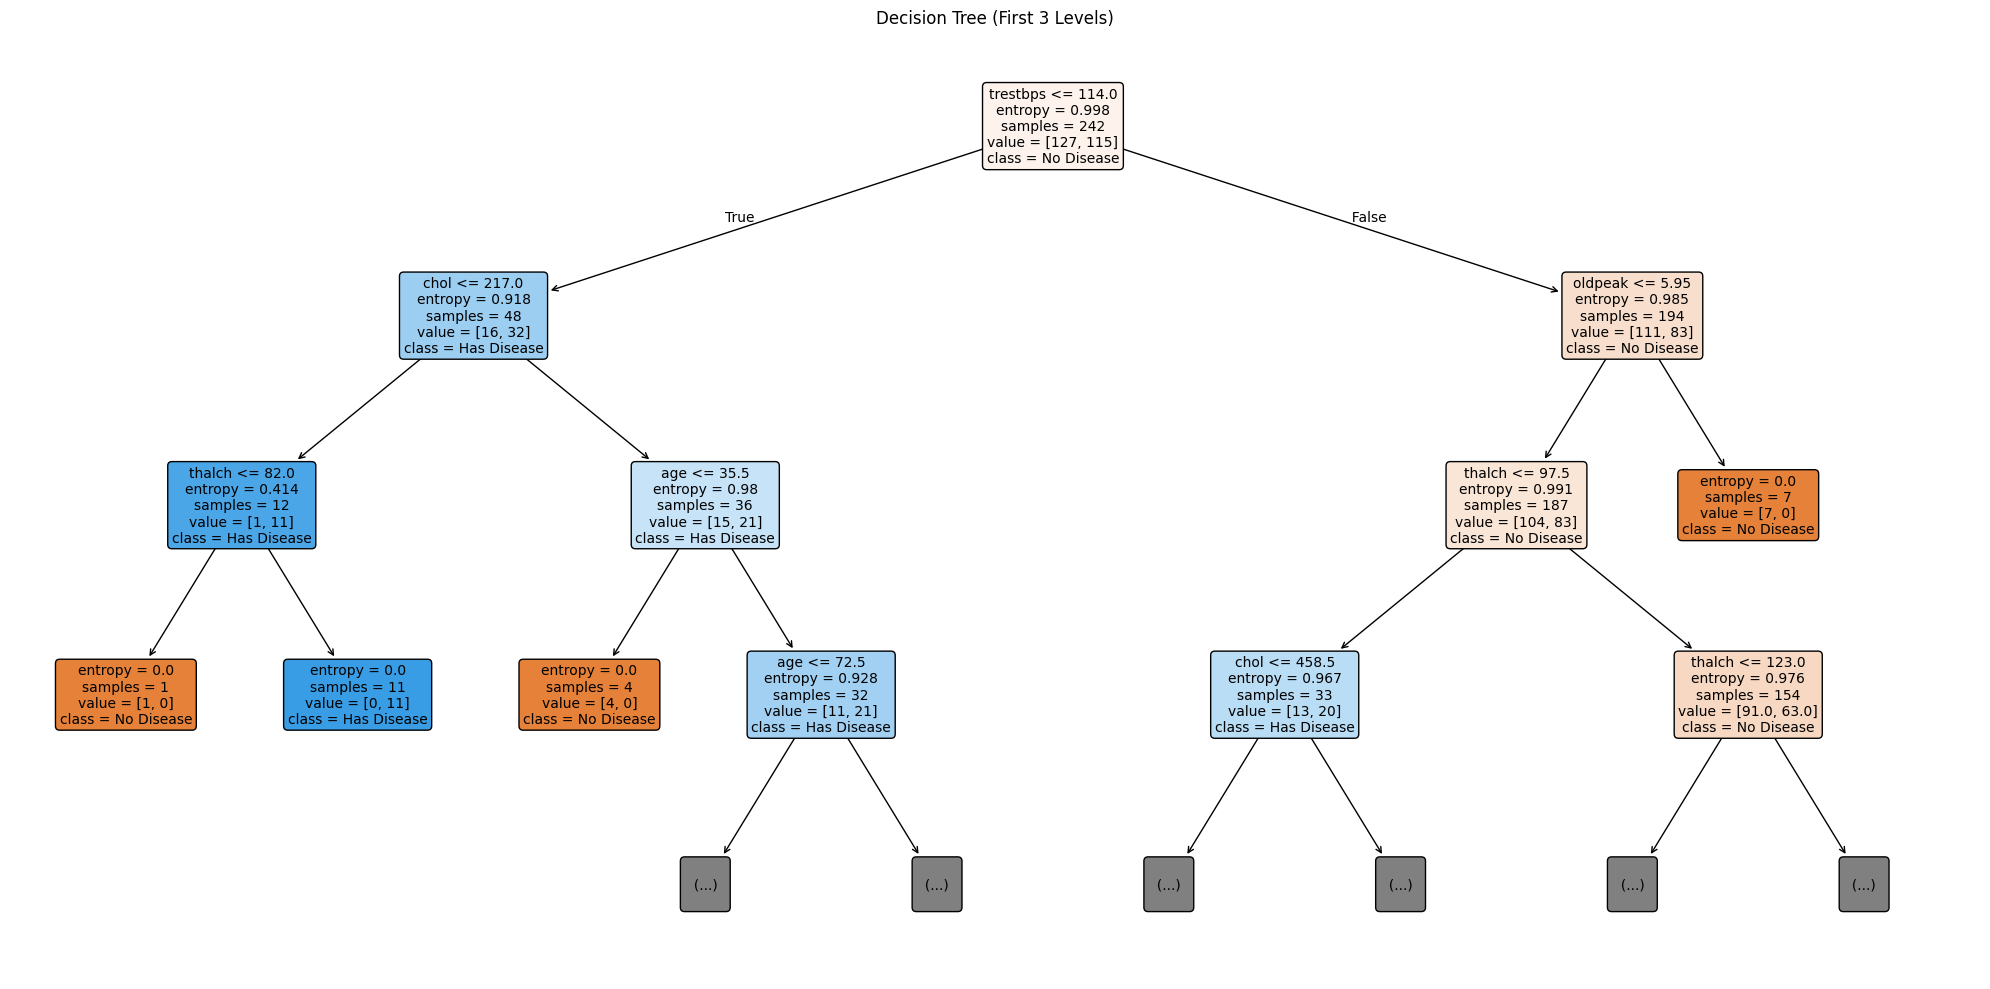

In [22]:
# Visualize the Decision Tree
print("=== Decision Tree Visualization ===")

plt.figure(figsize=(20, 10))
plot_tree(best_model, 
          feature_names=feature_cols,
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Show only first 3 levels for clarity
plt.title('Decision Tree (First 3 Levels)')
plt.tight_layout()
plt.show()

=== Feature Importance ===


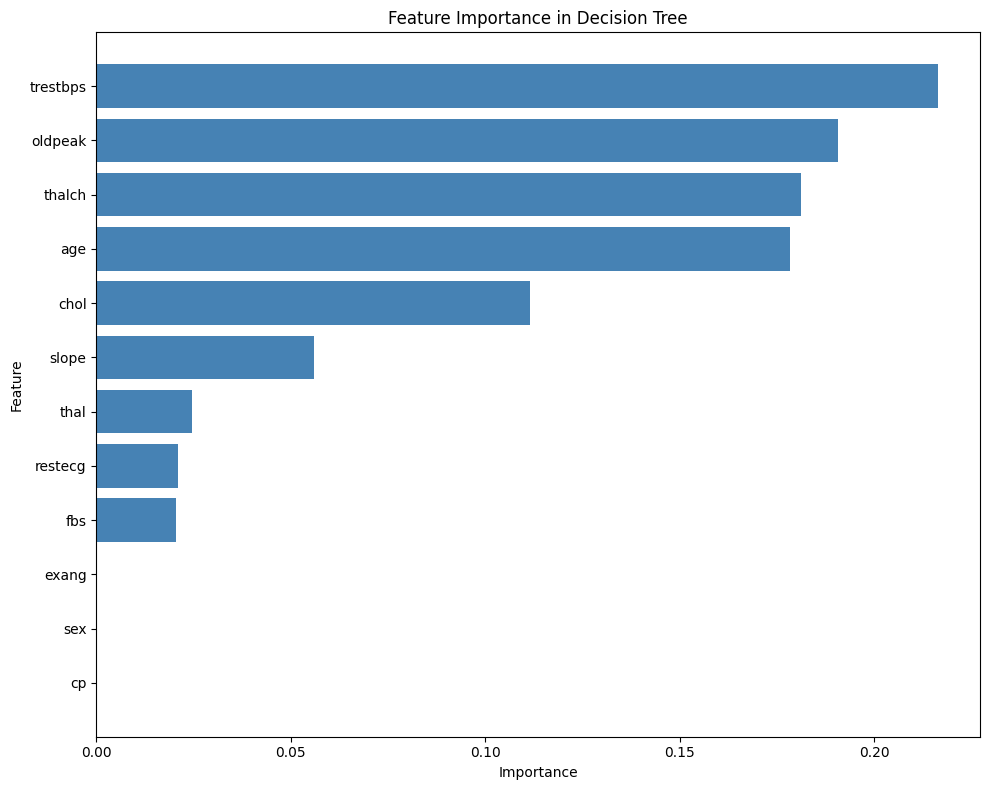


Top 5 Most Important Features:
1. trestbps - 0.2164
2. oldpeak - 0.1908
3. thalch - 0.181
4. age - 0.1782
5. chol - 0.1115


In [23]:
# Feature Importance
print("=== Feature Importance ===")

# Get feature importances
importances = best_model.feature_importances_

# Create dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
top_features = importance_df.sort_values('Importance', ascending=False).head(5)
for i in range(len(top_features)):
    row = top_features.iloc[i]
    print(str(i+1) + ".", row['Feature'], "-", round(row['Importance'], 4))

=== ROC Curve ===


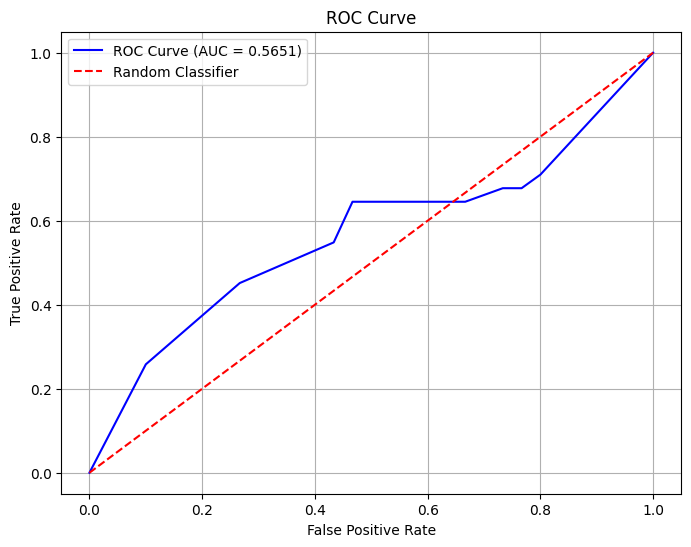

In [24]:
# ROC Curve
print("=== ROC Curve ===")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = ' + str(round(roc_auc_best, 4)) + ')')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

---
## Interview Questions

### 1. Common Hyperparameters of Decision Trees

| Hyperparameter | Description | Effect |
|----------------|-------------|--------|
| **max_depth** | Maximum depth of tree | Higher = more complex, may overfit |
| **min_samples_split** | Minimum samples to split a node | Higher = less complex, prevents overfitting |
| **min_samples_leaf** | Minimum samples in leaf node | Higher = smoother decision boundary |
| **criterion** | Splitting criterion (gini/entropy) | Gini is faster, entropy may give slightly better results |
| **max_features** | Number of features to consider | Lower = more randomness, reduces overfitting |

### 2. Label Encoding vs One-Hot Encoding

| Aspect | Label Encoding | One-Hot Encoding |
|--------|---------------|------------------|
| **Method** | Assigns numbers (0,1,2...) | Creates binary columns |
| **Columns** | Same number of columns | Creates many new columns |
| **Assumption** | Implies ordinal relationship | No ordinal assumption |
| **Best for** | Ordinal categories, Tree models | Nominal categories, Linear models |
| **Example** | Low=0, Medium=1, High=2 | Color_Red=1, Color_Blue=0 |

---
## Summary

In this assignment, we:

1. **Loaded and explored** the heart disease dataset
2. **Preprocessed data** by handling missing values and encoding categorical variables
3. **Built a Decision Tree** classifier with 80-20 train-test split
4. **Tuned hyperparameters** to find the best model configuration
5. **Evaluated the model** using accuracy, precision, recall, F1-score, and ROC-AUC
6. **Visualized** the decision tree and feature importance